# BreizhCrops-Time-Series

Field label data acquired from https://www.data.gouv.fr/fr/datasets/registre-parcellaire-graphique-rpg-contours-des-parcelles-et-ilots-culturaux-et-leur-groupe-de-cultures-majoritaire/
Satellite data from Google Earth Engine

In [1]:
import sys
sys.path.append("..")

import numpy as np
from breizhcrops import BreizhCrops
import pandas as pd
import geopandas as gpd
import contextily as ctx

bands = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
   'B8A', 'B9', 'QA10', 'QA20', 'QA60', 'doa']

padding_value = -1

root="../data"

## Initialize Dataset

In [2]:
frh01 = BreizhCrops(region="frh01", root=root, padding_value=padding_value)
frh02 = BreizhCrops(region="frh02", root=root, padding_value=padding_value)
frh03 = BreizhCrops(region="frh03", root=root, padding_value=padding_value)
frh04 = BreizhCrops(region="frh04", root=root, padding_value=padding_value)

Initializing BreizhCrops region frh01
Initializing BreizhCrops region frh02
Initializing BreizhCrops region frh03
Initializing BreizhCrops region frh04


## Culture Groups

In [5]:
frh04.get_codes().head()

,Libellé Culture,Code Groupe Culture,Libellé Groupe Culture
Code Culture,,,
BTH,Blé tendre d'hiver,1,Blé tendre
BTP,Blé tendre de printemps,1,Blé tendre
MID,Maïs doux,2,Maïs grain et ensilage
MIE,Maïs ensilage,2,Maïs grain et ensilage
MIS,Maïs,2,Maïs grain et ensilage


### Retrieve and plot single time series

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def plot_timeseries(dataset, idx):

    X,y = dataset[idx]
    fid = dataset.get_fid(idx)

    X = pd.DataFrame(X, columns=bands)

    # remove padded values
    X = X.loc[X[bands[0]]!=padding_value]

    # recover date index
    X["doa"] = pd.to_datetime(X["doa"])
    X = X.set_index("doa")

    selected_bands = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']
    x = X[selected_bands]

    fig, axs = plt.subplots(3,1,figsize=(12,6), sharex=True)

    ax = axs[0]
    ax.plot(x)
    ax.legend(selected_bands, ncol=6)
    label = frh01.mapping.loc[y]
    ax.set_title(f"Group {y}: {label.classname} (id:{label.id}). Field {fid}")

    ax = axs[1]
    qa = X[["QA10","QA20","QA60"]]
    ax.plot(qa)
    ax.legend(["QA10","QA20","QA60"])
    ax.set_title(f"Quality Bands. Cloud Coverage")

    ax = axs[2]
    x = X.loc[X["QA60"]==0]
    ax.plot(x)
    ax.legend(selected_bands, ncol=6)
    ax.set_title(f"time series where QA60=0")

    fig.tight_layout()
    plt.show()
    

def plot_parcel_location(idx, dataset):

    def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
        xmin, xmax, ymin, ymax = ax.axis()
        basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
        ax.imshow(basemap, extent=extent, interpolation='bilinear')
        # restore original x/y limits
        ax.axis((xmin, xmax, ymin, ymax))

    gdf = dataset.geodataframe().to_crs(epsg=3857)
    parcel_geometry = gdf.loc[frh01.get_fid(idx)]

    fig,ax = plt.subplots(1,1,figsize=(9, 9))
    geom = gpd.GeoDataFrame(parcel_geometry).T
    ax.set_xlim((geom.geometry.centroid.x.values - 1000, geom.geometry.centroid.x.values + 1000))
    ax.set_ylim((geom.geometry.centroid.y.values - 1000, geom.geometry.centroid.y.values + 1000))
    ax = geom.plot(ax=ax)
    gdf.plot(alpha=0.2, ax=ax)
    add_basemap(ax,zoom=13)

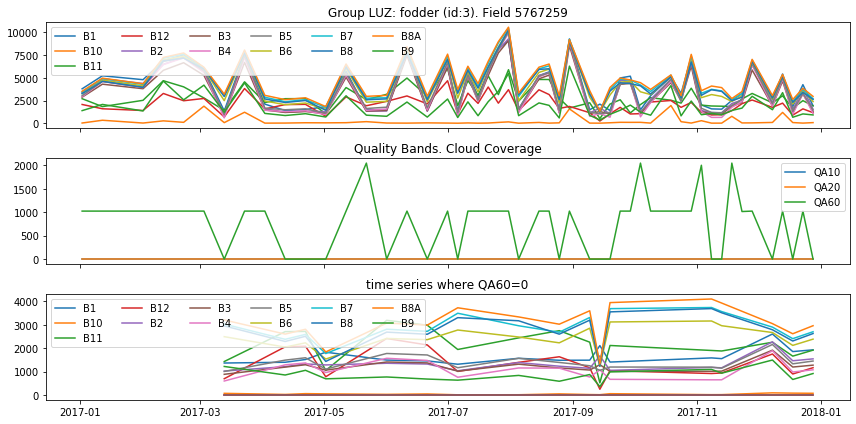

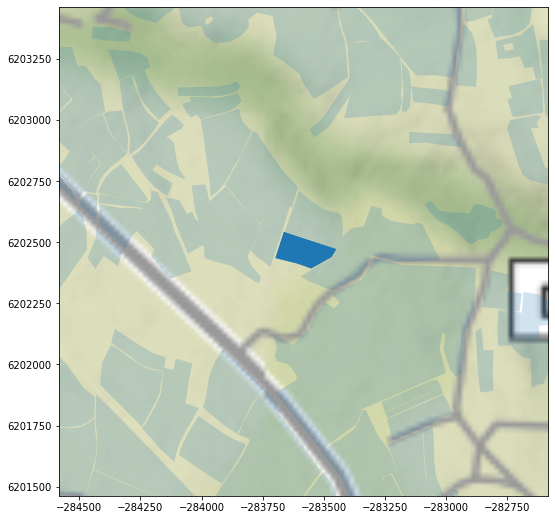

In [80]:
plot_timeseries(idx=0, dataset=frh01)
plot_parcel_location(idx=0, dataset=frh01)

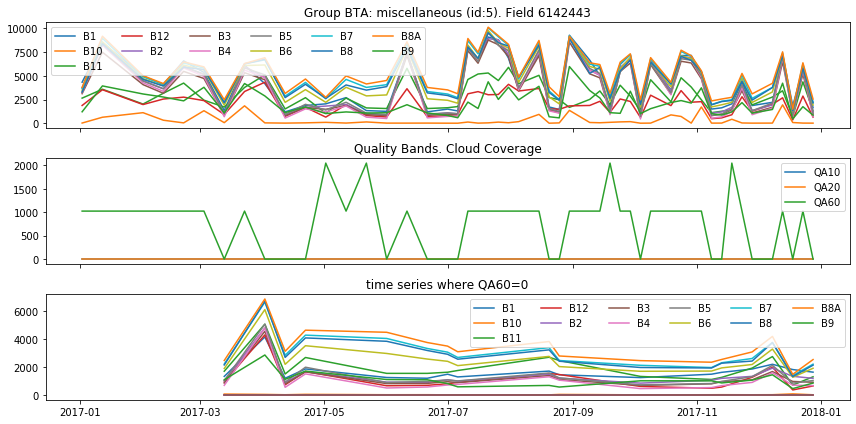

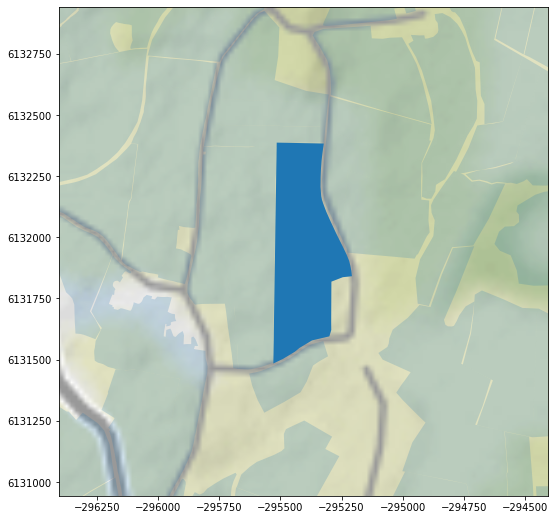

In [82]:
plot_timeseries(idx=600, dataset=frh01)
plot_parcel_location(idx=600, dataset=frh01)